## The usual ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Load data ...

In [2]:
df = pd.read_csv('workable_data.csv')
df.head()

,﻿Name,Job title,Creation time,Stage,Job post date,Time to fill,Time to hire,Current Pipeline
0,Aisha Padriga,Aviation Strategist ( Airport/Airline ),2017-07-24T16:50:17+08:00,Applied,NaN,NaN,NaN,1.0
1,Giang Ly Bang,Managing Director,2017-07-24T16:22:03+08:00,Applied,NaN,NaN,NaN,1.0
2,RABI JAYAKUMAR,Managing Director,2017-07-24T14:36:27+08:00,Applied,NaN,NaN,NaN,1.0
3,LeeMing Choong,Chief Research Officer,2017-07-24T14:29:47+08:00,Applied,NaN,NaN,NaN,1.0
4,Ceegee Venugopalan,Aviation Strategist ( Airport/Airline ),2017-07-24T06:15:57+08:00,Applied,NaN,NaN,NaN,1.0


In [3]:
print df.dtypes

﻿Name                object
Job title            object
Creation time        object
Stage                object
Job post date        object
Time to fill        float64
Time to hire        float64
Current Pipeline    float64
dtype: object


### Format timings

In [4]:
df['Creation time'] = pd.to_datetime(df['Creation time'])
df['Job post date'] = pd.to_datetime(df['Job post date'])
df.head()

,﻿Name,Job title,Creation time,Stage,Job post date,Time to fill,Time to hire,Current Pipeline
0,Aisha Padriga,Aviation Strategist ( Airport/Airline ),2017-07-24 08:50:17,Applied,NaT,NaN,NaN,1.0
1,Giang Ly Bang,Managing Director,2017-07-24 08:22:03,Applied,NaT,NaN,NaN,1.0
2,RABI JAYAKUMAR,Managing Director,2017-07-24 06:36:27,Applied,NaT,NaN,NaN,1.0
3,LeeMing Choong,Chief Research Officer,2017-07-24 06:29:47,Applied,NaT,NaN,NaN,1.0
4,Ceegee Venugopalan,Aviation Strategist ( Airport/Airline ),2017-07-23 22:15:57,Applied,NaT,NaN,NaN,1.0


### Drop names and format strings

In [5]:
df['Stage'] = df['Stage'].astype(str)
df['Job title'] = df['Job title'].astype(str)
df = df[df.columns[1:]]
df.head()

,Job title,Creation time,Stage,Job post date,Time to fill,Time to hire,Current Pipeline
0,Aviation Strategist ( Airport/Airline ),2017-07-24 08:50:17,Applied,NaT,NaN,NaN,1.0
1,Managing Director,2017-07-24 08:22:03,Applied,NaT,NaN,NaN,1.0
2,Managing Director,2017-07-24 06:36:27,Applied,NaT,NaN,NaN,1.0
3,Chief Research Officer,2017-07-24 06:29:47,Applied,NaT,NaN,NaN,1.0
4,Aviation Strategist ( Airport/Airline ),2017-07-23 22:15:57,Applied,NaT,NaN,NaN,1.0


In [6]:
df.dtypes

Job title                   object
Creation time       datetime64[ns]
Stage                       object
Job post date       datetime64[ns]
Time to fill               float64
Time to hire               float64
Current Pipeline           float64
dtype: object

## Plotting time ...

In [7]:
job_stages = df.groupby(['Job title', 'Stage']).size()
job_stages.head(20)

Job title                                                     Stage          
ASPIRIA E-commerce & Sales Full Time (Malaysia OR Singapore)  Applied             46
ASPIRIA Engineer                                              Applied              5
Admin Intern                                                  1st Interview        2
                                                              Applied             53
                                                              Offer                2
Advertising Sales Director                                    Applied             19
Aviation Entrepreneur                                         1st Interview       15
                                                              2nd Interview        3
                                                              Applied            273
                                                              Final interview      2
                                                              Hired     

In [8]:
multi_index = df.groupby(['Job title', 'Stage', 'Time to hire', 'Job post date']).size()
multi_index.head(20)

Job title                          Stage            Time to hire  Job post date      
Aviation Entrepreneur              1st Interview    101.0         2017-02-08 08:42:14     15
                                   2nd Interview    101.0         2017-02-08 08:42:14      3
                                   Applied          101.0         2017-02-08 08:42:14    273
                                   Final interview  101.0         2017-02-08 08:42:14      2
                                   Hired            101.0         2017-02-08 08:42:14      3
                                   Phone Screen     101.0         2017-02-08 08:42:14      3
                                   Sourced          101.0         2017-02-08 08:42:14     31
Beauty Information Portal Manager  Applied          53.0          2016-04-22 09:37:27      2
                                   Hired            53.0          2016-04-22 09:37:27      1
Business Development Internship    1st Interview    82.0          2016-03-24 

In [9]:
job_stages.unstack(level=1).head()

Stage,1st Interview,2nd Interview,Applied,Final interview,Hired,Offer,Phone Screen,Sourced
Job title,,,,,,,,
ASPIRIA E-commerce & Sales Full Time (Malaysia OR Singapore),NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN
ASPIRIA Engineer,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
Admin Intern,2.0,NaN,53.0,NaN,NaN,2.0,NaN,NaN
Advertising Sales Director,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN
Aviation Entrepreneur,15.0,3.0,273.0,2.0,3.0,NaN,3.0,31.0


In [10]:
job_table = job_stages.unstack(level=1)

In [11]:
stage_cols = job_table.columns.tolist()
print stage_cols
stage_order = [stage_cols[7], stage_cols[2], stage_cols[6], stage_cols[0], stage_cols[1], stage_cols[3], stage_cols[5], stage_cols[4]]
print stage_order
job_table = job_table[stage_order]
job_table.head()

['1st Interview', '2nd Interview', 'Applied', 'Final interview', 'Hired', 'Offer', 'Phone Screen', 'Sourced']
['Sourced', 'Applied', 'Phone Screen', '1st Interview', '2nd Interview', 'Final interview', 'Offer', 'Hired']


Stage,Sourced,Applied,Phone Screen,1st Interview,2nd Interview,Final interview,Offer,Hired
Job title,,,,,,,,
ASPIRIA E-commerce & Sales Full Time (Malaysia OR Singapore),NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN
ASPIRIA Engineer,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Admin Intern,NaN,53.0,NaN,2.0,NaN,NaN,2.0,NaN
Advertising Sales Director,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN
Aviation Entrepreneur,31.0,273.0,3.0,15.0,3.0,2.0,NaN,3.0


In [12]:
job_table2 = job_table.copy()

for i, v in enumerate(job_table.columns[1:]):
    job_table2[v] = job_table2[job_table2.columns[i+1:]].sum(axis=1)

job_table2.head()


Stage,Sourced,Applied,Phone Screen,1st Interview,2nd Interview,Final interview,Offer,Hired
Job title,,,,,,,,
ASPIRIA E-commerce & Sales Full Time (Malaysia OR Singapore),NaN,46.0,0.0,0.0,0.0,0.0,0.0,0.0
ASPIRIA Engineer,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Admin Intern,NaN,57.0,4.0,4.0,2.0,2.0,2.0,0.0
Advertising Sales Director,NaN,19.0,0.0,0.0,0.0,0.0,0.0,0.0
Aviation Entrepreneur,31.0,299.0,26.0,23.0,8.0,5.0,3.0,3.0


In [13]:
conversion_rates = job_table2.copy()
temp = 'Hired'

for v in reversed(conversion_rates.columns.tolist()[:-1]):
    conversion_rates[temp] /= conversion_rates[v]
    conversion_rates[temp] *= 100.0
    temp = v

conversion_rates.head()

Stage,Sourced,Applied,Phone Screen,1st Interview,2nd Interview,Final interview,Offer,Hired
Job title,,,,,,,,
ASPIRIA E-commerce & Sales Full Time (Malaysia OR Singapore),NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
ASPIRIA Engineer,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
Admin Intern,NaN,NaN,7.017544,100.000000,50.000000,100.0,100.0,0.0
Advertising Sales Director,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
Aviation Entrepreneur,31.0,964.516129,8.695652,88.461538,34.782609,62.5,60.0,100.0


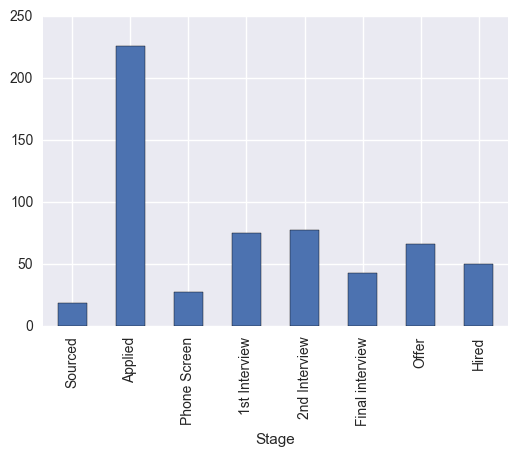

In [14]:
conversion_rates.loc[conversion_rates.index[20],:].plot.bar()

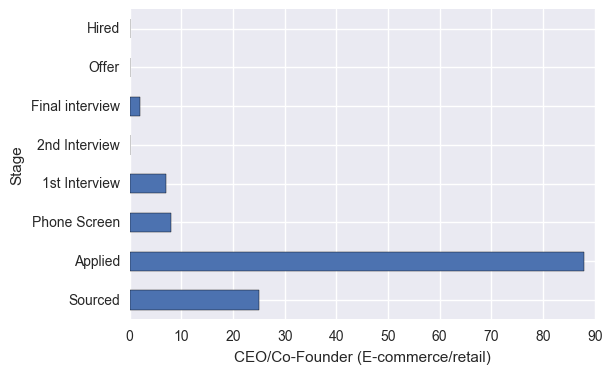

In [15]:
job_table.loc[job_table.index[12],:].plot.barh()
plt.xlabel(job_table.index[12])

In [16]:
job_hires = df[df['Time to hire'].notnull()]
print job_hires.shape
job_hires.head()

(3057, 7)


,Job title,Creation time,Stage,Job post date,Time to fill,Time to hire,Current Pipeline
16,Financial Controller,2017-07-22 10:02:21,Applied,2016-10-17 02:38:04,151.0,143.0,NaN
20,Financial Controller,2017-07-21 14:25:31,Applied,2016-10-17 02:38:04,151.0,143.0,NaN
34,Financial Controller,2017-07-20 05:05:39,Applied,2016-10-17 02:38:04,151.0,143.0,NaN
35,Early Talent Pool,2017-07-20 03:59:32,Applied,2016-10-03 03:59:18,240.0,54.0,1.0
41,Financial Controller,2017-07-19 15:09:26,Applied,2016-10-17 02:38:04,151.0,143.0,NaN


In [17]:
#job_hires.groupby(['Job title', 'Time to hire']).mean().head(20)
jobs = job_hires['Job title'].unique()
hires = []
posts = []
for job in jobs:
    hire_time = job_hires[job_hires['Job title']==job]['Time to hire'].mean()
    post_times = job_hires[job_hires['Job title']==job]['Job post date'].tolist()
    post_time = post_times[0]
    hires.append(hire_time)
    posts.append(post_time)
    #print hire_time
    #print job
    #print post_times
    
#sns.barplot(job_hires['Time to fill'], job_hires['Job title'])

In [18]:
jobs_df = pd.DataFrame()
jobs_df['Job'] = jobs
jobs_df['Post'] = list(posts)
jobs_df['Hire_time'] = hires
jobs_df.head()

,Job,Post,Hire_time
0,Financial Controller,2016-10-17 02:38:04,143.0
1,Early Talent Pool,2016-10-03 03:59:18,54.0
2,Corporate Strategy Associate (Japanese-speaking),2016-10-16 17:03:29,112.0
3,Aviation Entrepreneur,2017-02-08 08:42:14,101.0
4,Investments Lead,2017-04-08 11:43:24,10.0


5    74.0
Name: Hire_time, dtype: float64


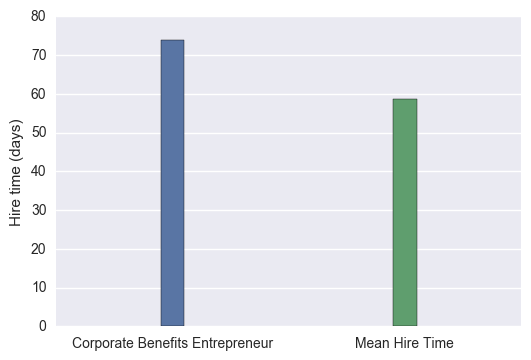

In [19]:
job_title = job_table.index[20]
value = jobs_df[jobs_df['Job']==job_title]['Hire_time']
print value

newwidth = 0.1
ax = sns.barplot([job_title, 'Mean Hire Time'], [value, jobs_df['Hire_time'].mean()])
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2
    
    bar.set_width(width)
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
plt.ylabel('Hire time (days)')
plt.show()


In [20]:
jobs_time = jobs_df.set_index(jobs_df['Post'])
avg_hire_times = jobs_time.groupby(pd.TimeGrouper(freq='M')).mean()
avg_hire_times

,Hire_time
Post,
2016-02-29,87.00
2016-03-31,113.25
2016-04-30,33.50
2016-05-31,46.00
2016-06-30,120.00
2016-07-31,27.50
2016-08-31,34.00
2016-09-30,18.00
2016-10-31,93.25


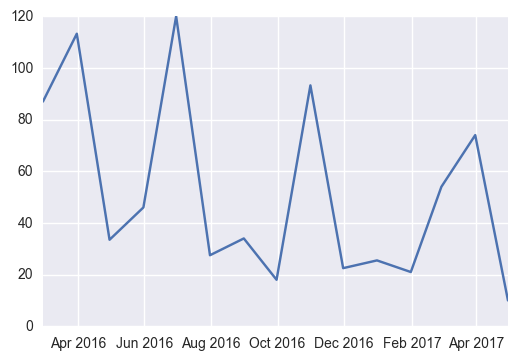

In [21]:
plt.plot(avg_hire_times['Hire_time'])

In [22]:
def plot_dash(i):
    print 'Jobs with hires: %d' % jobs_df.shape[0]
    print 'Jobs in total: %d' % len(job_table.index)
    print ''
    job_title = job_table.index[i]
    print 'Job: %s' % job_title
    if job_title in jobs_df['Job'].tolist():
        value = jobs_df[jobs_df['Job']==job_title]['Hire_time']
        print 'Posted on:'
        print jobs_df[jobs_df['Job']==job_title]['Post']
    
        newwidth = 0.2        
        plt.figure(figsize=(24, 18))
        plt.subplot(3, 1, 1)
        job_table.loc[job_table.index[i],:].plot.barh()
        plt.xlabel('Number of people')
        
        plt.subplot(3, 1, 2)
        plt.ylabel('Hire time (days)')
        ax = sns.barplot([job_title, 'Mean Hire Time'], [value, jobs_df['Hire_time'].mean()])
        for bar in ax.patches:
            x = bar.get_x()
            width = bar.get_width()
            centre = x+width/2
    
            bar.set_width(width)
            bar.set_x(centre-newwidth/2.)
            bar.set_width(newwidth)
        
        plt.subplot(3, 1, 3)
        plt.ylabel('Hire time (days)')
        plt.plot(avg_hire_times['Hire_time'])
        
        plt.show()
    else:
        plt.figure(figsize=(16, 12))
        plt.subplot(2, 1, 1)
        job_table.loc[job_table.index[i],:].plot.barh()
        plt.xlabel('Number of people')
        
        plt.subplot(2, 1, 2)
        plt.ylabel('Hire time (days)')
        plt.plot(avg_hire_times['Hire_time'])
        
        plt.show()

Jobs with hires: 29
Jobs in total: 68

Job: Corporate Benefits Entrepreneur
Posted on:
5   2017-03-21 15:14:26
Name: Post, dtype: datetime64[ns]


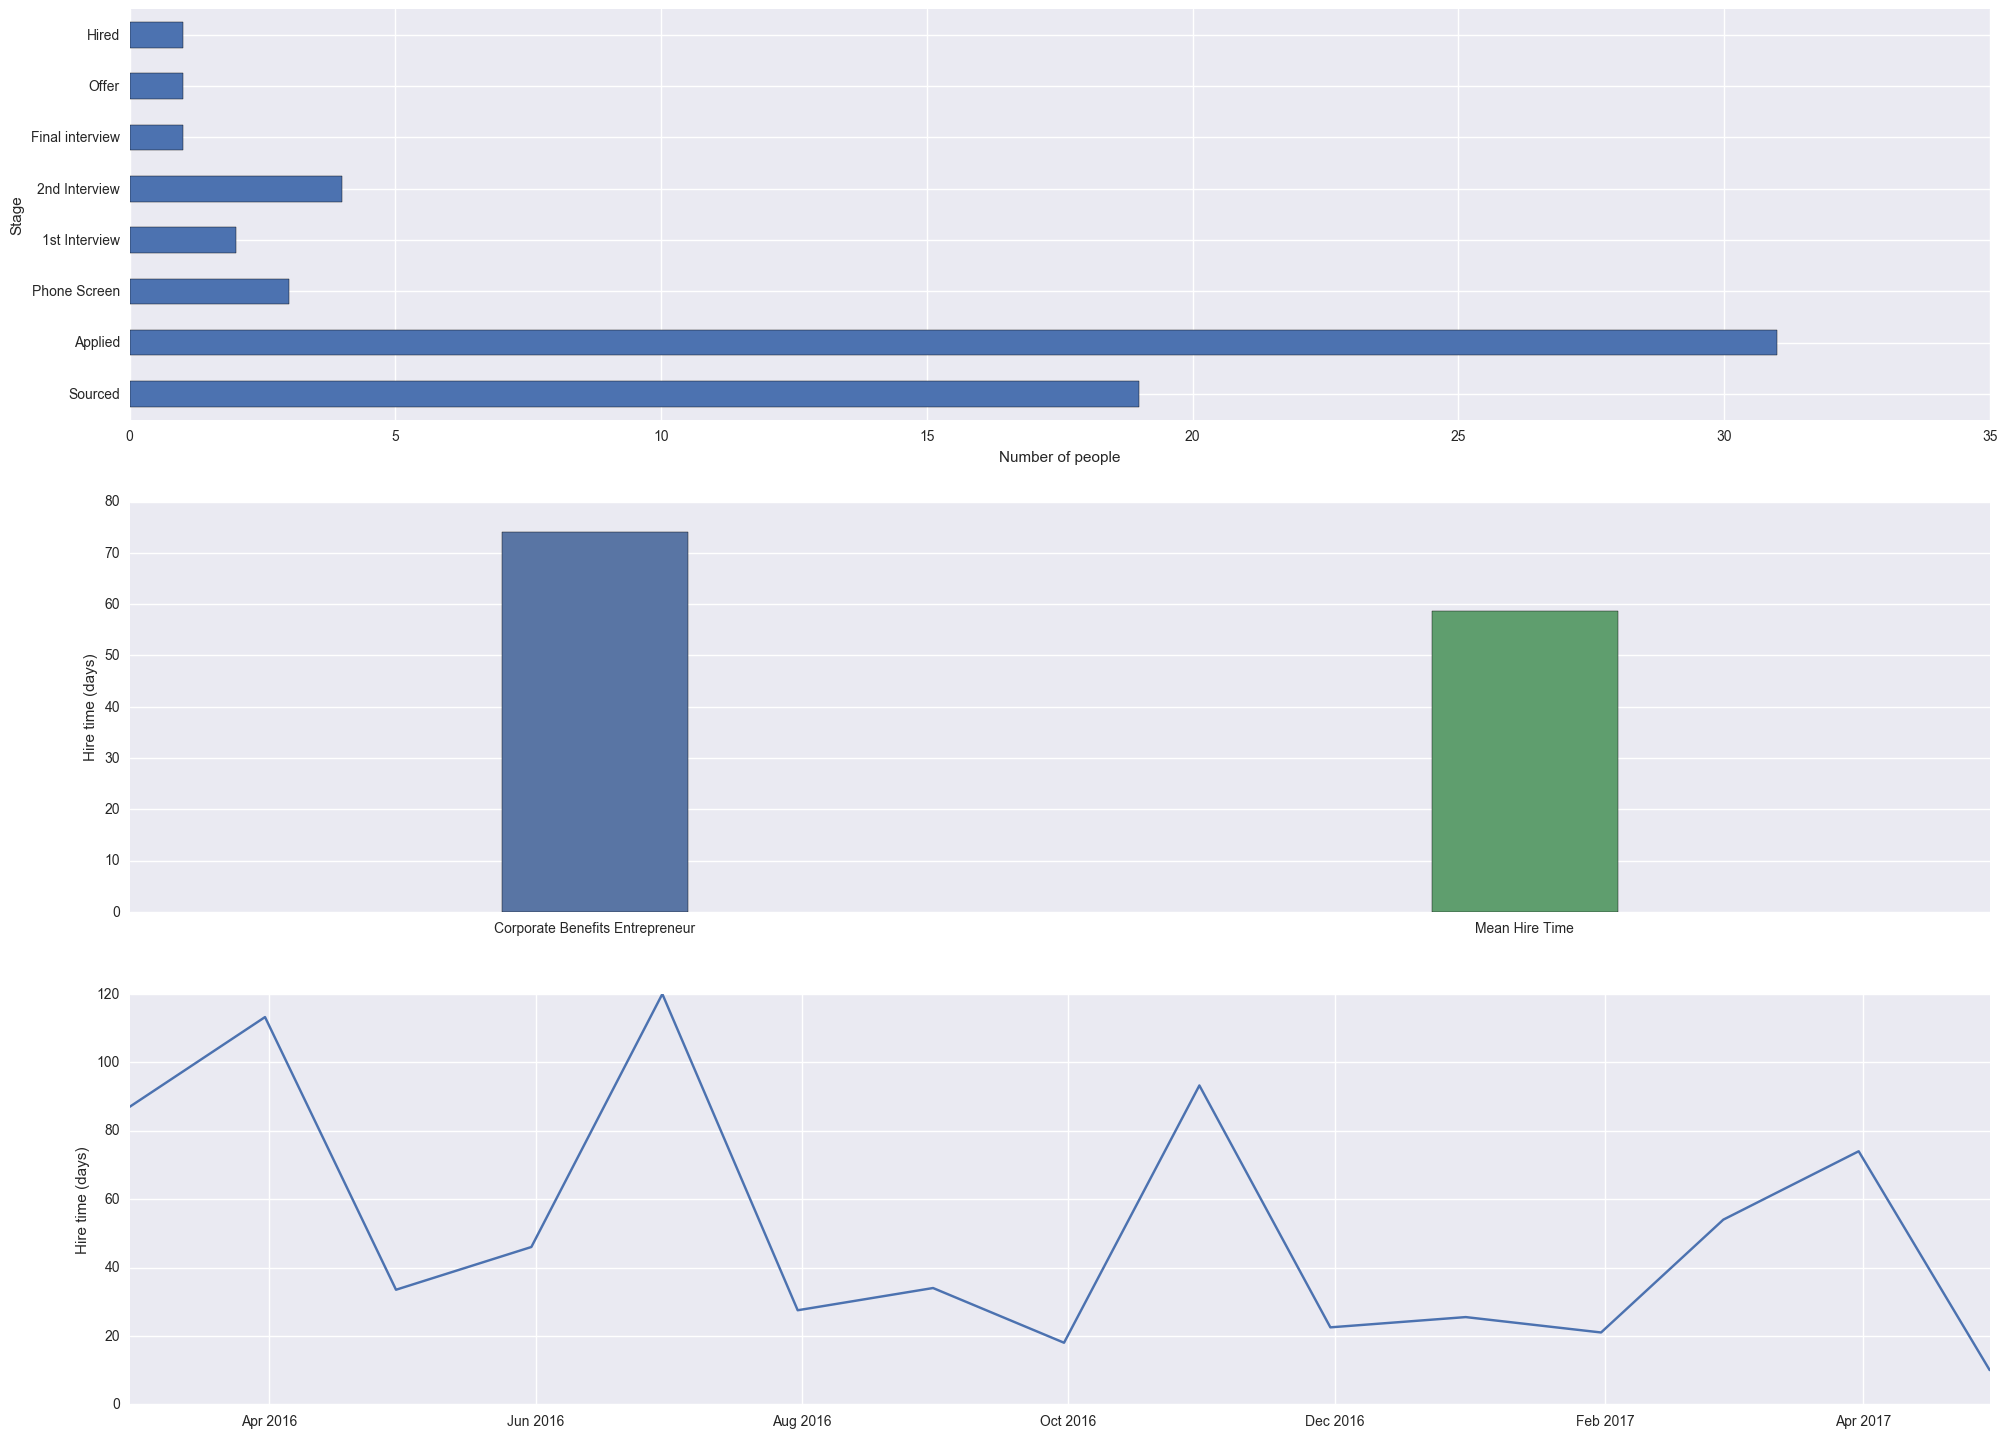

In [23]:
plot_dash(20)

In [24]:
from ipywidgets import widgets, interactive

In [25]:
menu = {}
for i, v in enumerate(job_table.index):
    menu[v] = i
    
job_widget = widgets.Dropdown(
    options=menu,
    value=20,
    description='Job:',
)

In [26]:
print df.shape
current = len(df[df['Current Pipeline'].notnull()]['Job title'].unique())
current_jobs = list(df[df['Current Pipeline'].notnull()]['Job title'].unique())

(4861, 7)


In [27]:
def plot_widget(job_index):
    i = job_index
    print 'Jobs with hires: %d' % jobs_df.shape[0]
    print 'Jobs in current pipeline: %d' % current
    print 'Jobs in total: %d' % len(job_table2.index)
    print ''
    job_title = job_table2.index[i]
    print 'Job: %s' % job_title
    if job_title in current_jobs:
        print 'Still in current pipeline'
    if job_title in jobs_df['Job'].tolist():
        print 'Posted on:'
        print jobs_df[jobs_df['Job']==job_title]['Post'].tolist()[0]
    
        newwidth = 0.2        
        plt.figure(figsize=(24, 24))
        plt.subplot(4, 1, 1)
        job_table2.loc[job_table.index[i],:].plot.barh()
        plt.xlabel('Number of people')
        
        plt.subplot(4, 1, 2)
        plt.ylabel('Conversion (%)')
        conversion_rates[conversion_rates.columns[2:]].loc[conversion_rates.index[i],:].plot.bar(rot=0)
        
        plt.subplot(4, 1, 3)
        plt.ylabel('Hire time (days)')
        ax = sns.barplot([job_title, 'Mean Hire Time'], [value, jobs_df['Hire_time'].mean()])
        for bar in ax.patches:
            x = bar.get_x()
            width = bar.get_width()
            centre = x+width/2
    
            bar.set_width(width)
            bar.set_x(centre-newwidth/2.)
            bar.set_width(newwidth)
        
        plt.subplot(4, 1, 4)
        plt.ylabel('Hire time (days)')
        plt.plot(avg_hire_times['Hire_time'])
        
        plt.show()
    else:
        plt.figure(figsize=(16, 16))
        plt.subplot(3, 1, 1)
        job_table.loc[job_table2.index[i],:].plot.barh()
        plt.xlabel('Number of people')
        
        plt.subplot(3, 1, 2)
        plt.ylabel('Conversion (%)')
        conversion_rates[conversion_rates.columns[2:]].loc[conversion_rates.index[i],:].plot.bar(rot=0)
        
        plt.subplot(3, 1, 3)
        plt.ylabel('Hire time (days)')
        plt.plot(avg_hire_times['Hire_time'])
        
        plt.show()

In [28]:
interactive(plot_widget, job_index=job_widget)